# Multivariate Analysis

Loading the cleaned dataset

In [1602]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

In [1603]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1604]:
lcdci_df = pd.read_csv('lcdci/lcdci.csv')
lcdci_df

,country,region,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
0,Algeria,African Group,0.82,11.200000,1.0,31.0,0.745000,99.700000,0.2,1.615630e+05,8.654392e+04,12578.747600
1,Angola,African Group,53.43,148.000000,0.0,24.0,0.591000,50.000000,61.0,1.981450e+04,3.270324e+04,17757.867840
2,Benin,African Group,27.80,10.300000,1.0,30.0,0.504000,4.600000,46.2,7.980400e+03,4.029619e+03,3007.644632
3,Botswana,African Group,26.92,2.400000,1.0,30.0,0.708000,65.700000,27.2,5.763687e+03,3.434494e+03,2963.633551
4,Burkina Faso,African Group,22.72,12.500000,1.0,31.0,0.438000,11.700000,67.5,5.456700e+03,1.540827e+04,10060.671930
5,Burundi,African Group,10.89,10.100000,0.0,27.0,0.420000,0.200000,83.5,7.134660e+02,1.258192e+03,1636.389411
6,Cabo Verde,African Group,11.34,0.300000,1.0,29.0,0.661000,81.800000,23.4,6.206000e+02,9.320760e+01,59.475638
7,Cameroon,African Group,43.03,273.000000,1.0,30.0,0.587000,22.800000,78.9,9.928400e+03,1.779775e+04,62399.453370
8,Central African Republic,African Group,35.80,141.000000,1.0,29.0,0.387000,0.900000,90.9,2.366000e+02,1.010850e+04,10628.579070
9,Chad,African Group,3.43,15.000000,1.0,30.0,0.394000,8.000000,73.6,1.568400e+03,5.943892e+04,27724.591160


In [1605]:
lcdci_df.describe()

,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,1.910000e+02,1.910000e+02,191.000000
mean,32.446649,230.671852,0.937173,28.633508,0.721461,67.786380,32.500524,1.721520e+05,4.365359e+04,15980.829925
std,23.877781,669.314582,0.243290,3.726396,0.155448,37.168136,27.686081,8.743299e+05,1.277418e+05,50051.077037
min,0.000000,0.000000,0.000000,9.000000,0.380000,0.000000,0.000000,6.600000e+00,2.588257e+00,0.000000
25%,11.445000,6.000000,1.000000,29.000000,0.601000,35.300000,10.600000,2.673385e+03,2.525349e+03,684.390306
50%,31.170000,37.700000,1.000000,30.000000,0.739000,87.000000,23.800000,1.443550e+04,9.957260e+03,3567.365768
75%,49.425000,152.100000,1.000000,30.500000,0.845500,100.000000,50.000000,6.769175e+04,3.119410e+04,12491.469910
max,97.410000,5661.000000,1.000000,32.000000,0.967000,100.000000,96.200000,1.094469e+07,1.186285e+06,536920.210300


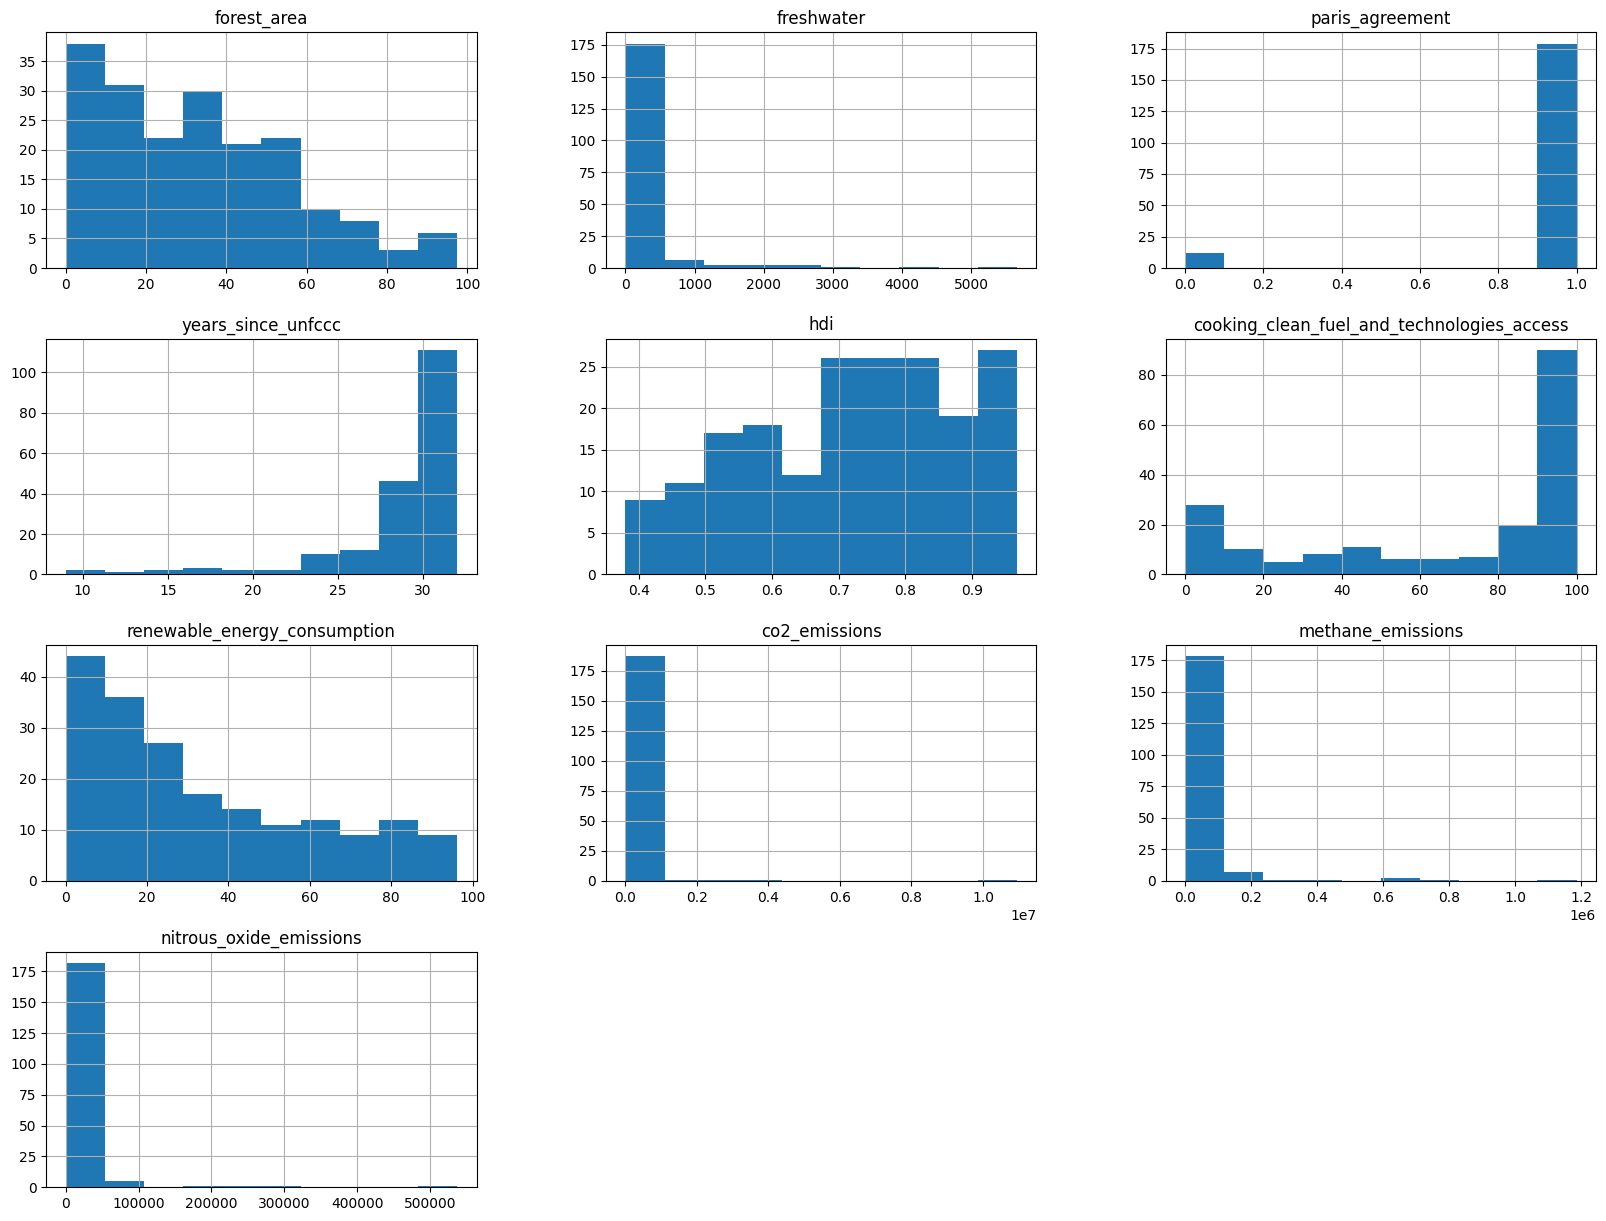

In [1606]:
lcdci_df.hist(figsize=(20, 15))  # Histograms of all columns
plt.show()

In [1607]:
forest_area = lcdci_df['forest_area']
freshwater = lcdci_df['freshwater']
paris_agreement = lcdci_df['paris_agreement']
unfccc = lcdci_df['years_since_unfccc']
hdi = lcdci_df['hdi']
clean_cooking_fuel_access = lcdci_df['cooking_clean_fuel_and_technologies_access']
renewable_energy_consumption = lcdci_df['renewable_energy_consumption']
co2_emissions = lcdci_df['co2_emissions']
methane_emissions = lcdci_df['methane_emissions']
nitrous_oxide_emissions = lcdci_df['nitrous_oxide_emissions']

## Pearson Correlation Coefficient

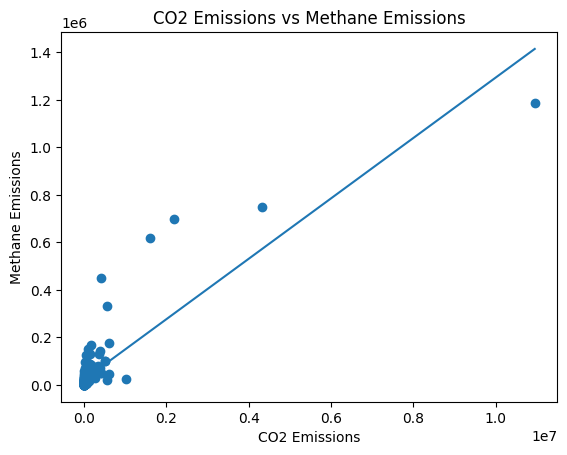

In [1608]:
plt.title("CO2 Emissions vs Methane Emissions")
plt.xlabel("CO2 Emissions")
plt.ylabel("Methane Emissions")
plt.scatter(co2_emissions, methane_emissions)
plt.plot(np.unique(co2_emissions), np.poly1d(np.polyfit(co2_emissions, methane_emissions, 1))(np.unique(co2_emissions)))

In [1609]:
corr = pearsonr(co2_emissions, methane_emissions)
corr

PearsonRResult(statistic=0.8712302668875839, pvalue=2.6044145682599243e-60)

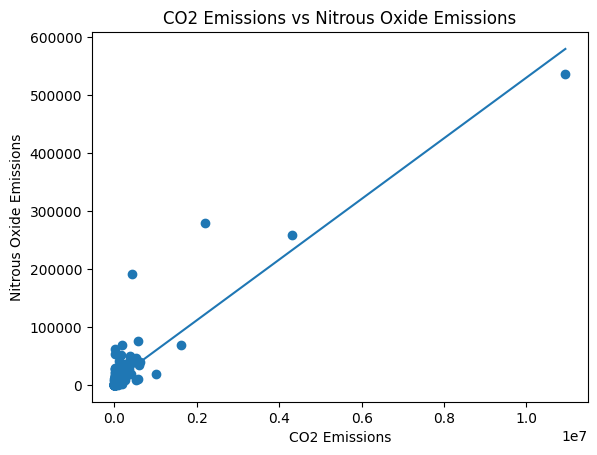

In [1610]:
plt.title("CO2 Emissions vs Nitrous Oxide Emissions")
plt.xlabel("CO2 Emissions")
plt.ylabel("Nitrous Oxide Emissions")
plt.scatter(co2_emissions, nitrous_oxide_emissions)
plt.plot(np.unique(co2_emissions), np.poly1d(np.polyfit(co2_emissions, nitrous_oxide_emissions, 1))(np.unique(co2_emissions)))

In [1611]:
corr = pearsonr(co2_emissions, nitrous_oxide_emissions)
corr

PearsonRResult(statistic=0.9144070733818833, pvalue=3.7082616591875925e-76)

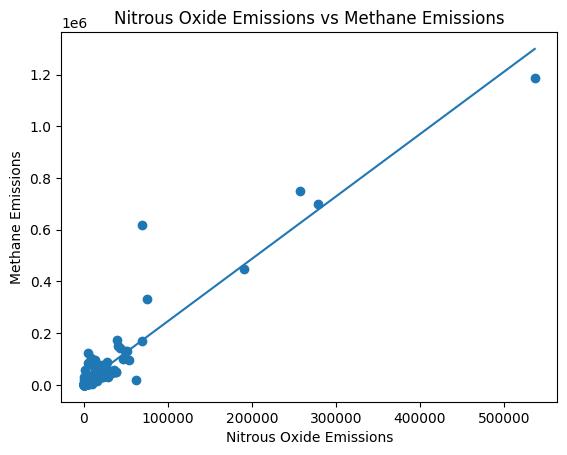

In [1612]:
plt.title("Nitrous Oxide Emissions vs Methane Emissions")
plt.xlabel("Nitrous Oxide Emissions")
plt.ylabel("Methane Emissions")
plt.scatter(nitrous_oxide_emissions, methane_emissions)
plt.plot(np.unique(nitrous_oxide_emissions), np.poly1d(np.polyfit(nitrous_oxide_emissions, methane_emissions, 1))(np.unique(nitrous_oxide_emissions)))

In [1613]:
corr = pearsonr(nitrous_oxide_emissions, methane_emissions)
corr

PearsonRResult(statistic=0.944359923976579, pvalue=3.282881930133654e-93)

Combine CO2 emission, methane emission, and nitrous oxide emission into one as they are strongly correlated and has the same unit of measurement

In [1614]:
lcdci_df["total_greenhouse_gas_emission"] = lcdci_df["co2_emissions"] + lcdci_df["methane_emissions"] + lcdci_df["nitrous_oxide_emissions"]
total_greenhouse_gas_emission = lcdci_df['total_greenhouse_gas_emission']
lcdci_df.head()

,country,region,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,cooking_clean_fuel_and_technologies_access,renewable_energy_consumption,co2_emissions,methane_emissions,nitrous_oxide_emissions,total_greenhouse_gas_emission
0,Algeria,African Group,0.82,11.2,1.0,31.0,0.745,99.7,0.2,161563.000,86543.923620,12578.747600,260685.671220
1,Angola,African Group,53.43,148.0,0.0,24.0,0.591,50.0,61.0,19814.500,32703.238110,17757.867840,70275.605950
2,Benin,African Group,27.80,10.3,1.0,30.0,0.504,4.6,46.2,7980.400,4029.619412,3007.644632,15017.664044
3,Botswana,African Group,26.92,2.4,1.0,30.0,0.708,65.7,27.2,5763.687,3434.493820,2963.633551,12161.814371
4,Burkina Faso,African Group,22.72,12.5,1.0,31.0,0.438,11.7,67.5,5456.700,15408.273140,10060.671930,30925.645070


Group years since joining UNFCCC to groups of every 5 years for better visualisation as a categorical variable

In [1615]:
max_year = lcdci_df['years_since_unfccc'].max()
bins = np.arange(lcdci_df['years_since_unfccc'].min(), max_year + 5, 5)
bin_labels = [f"{int(start)}-{int(end)}" for start, end in zip(bins[:-1], bins[1:])]
bin_labels

['9-14', '14-19', '19-24', '24-29', '29-34']

In [1616]:
lcdci_df['year_bins'] = pd.cut(lcdci_df['years_since_unfccc'], bins=bins, labels=bin_labels, right=False)
year_bins = lcdci_df['year_bins']

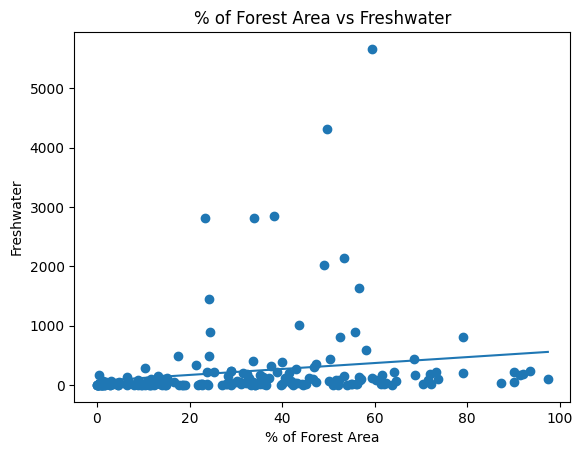

In [1617]:
plt.title("% of Forest Area vs Freshwater")
plt.xlabel("% of Forest Area")
plt.ylabel("Freshwater")
plt.scatter(forest_area, freshwater)
plt.plot(np.unique(forest_area), np.poly1d(np.polyfit(forest_area, freshwater, 1))(np.unique(forest_area)))

In [1618]:
corr = pearsonr(forest_area, freshwater)
corr

PearsonRResult(statistic=0.1787621705948745, pvalue=0.01335019365645941)

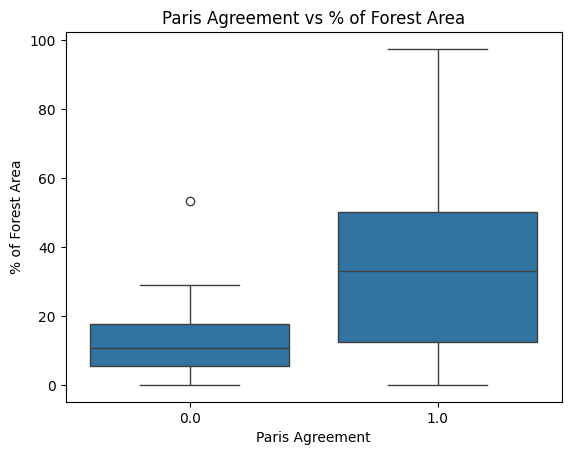

In [1619]:
sns.boxplot(x=paris_agreement, y=forest_area)
plt.xlabel('Paris Agreement')
plt.ylabel('% of Forest Area')
plt.title('Paris Agreement vs % of Forest Area')
plt.show()

In [1620]:
corr = pearsonr(forest_area, paris_agreement)
corr

PearsonRResult(statistic=0.19478100889281774, pvalue=0.006930446034669922)

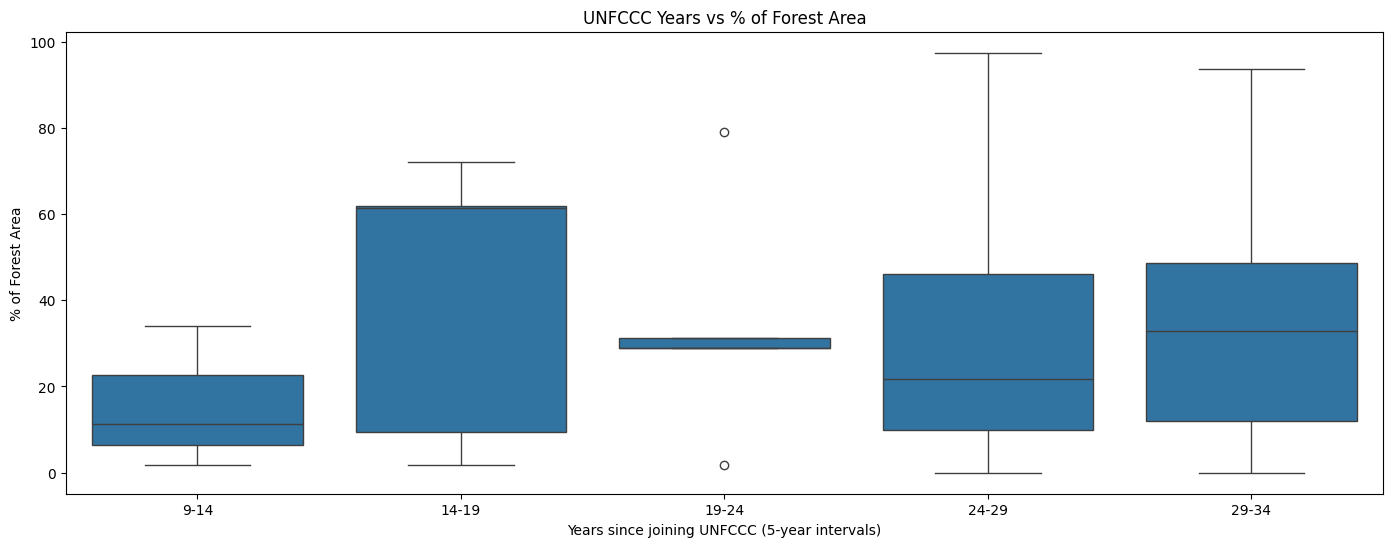

In [1621]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=year_bins, y=forest_area, data=lcdci_df)
plt.xlabel('Years since joining UNFCCC (5-year intervals)')
plt.ylabel('% of Forest Area')
plt.title('UNFCCC Years vs % of Forest Area')
plt.show()

In [1622]:
corr = pearsonr(forest_area, unfccc)
corr

PearsonRResult(statistic=0.022769384684598052, pvalue=0.7545435073946324)

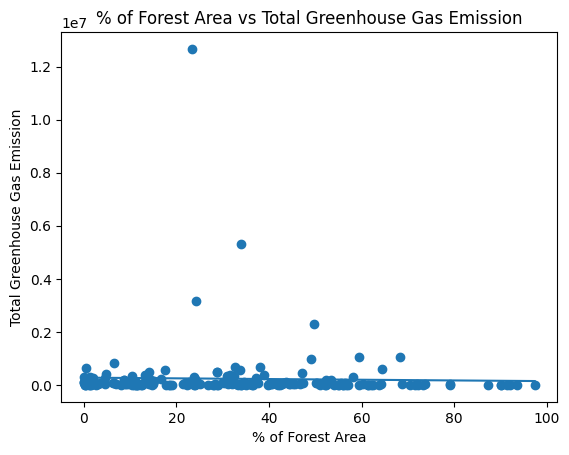

In [1623]:
plt.title("% of Forest Area vs Total Greenhouse Gas Emission")
plt.xlabel("% of Forest Area")
plt.ylabel("Total Greenhouse Gas Emission")
plt.scatter(forest_area, total_greenhouse_gas_emission)
plt.plot(np.unique(forest_area), np.poly1d(np.polyfit(forest_area, total_greenhouse_gas_emission, 1))(np.unique(forest_area)))

In [1624]:
corr = pearsonr(forest_area, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=-0.030332906855903383, pvalue=0.6770052630263707)

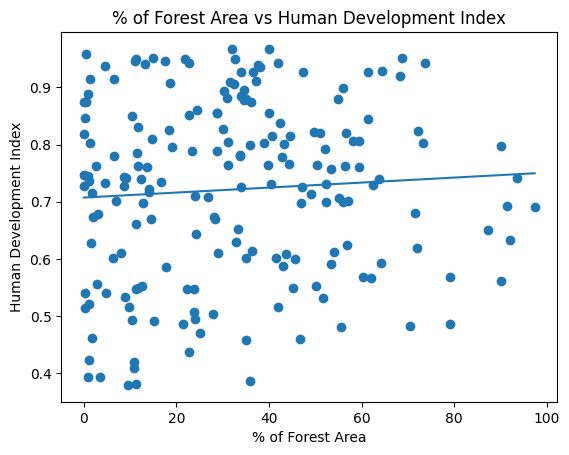

In [1625]:
plt.title("% of Forest Area vs Human Development Index")
plt.xlabel("% of Forest Area")
plt.ylabel("Human Development Index")
plt.scatter(forest_area, hdi)
plt.plot(np.unique(forest_area), np.poly1d(np.polyfit(forest_area, hdi, 1))(np.unique(forest_area)))

In [1626]:
corr = pearsonr(forest_area, hdi)
corr

PearsonRResult(statistic=0.06700445839223958, pvalue=0.3570625018054575)

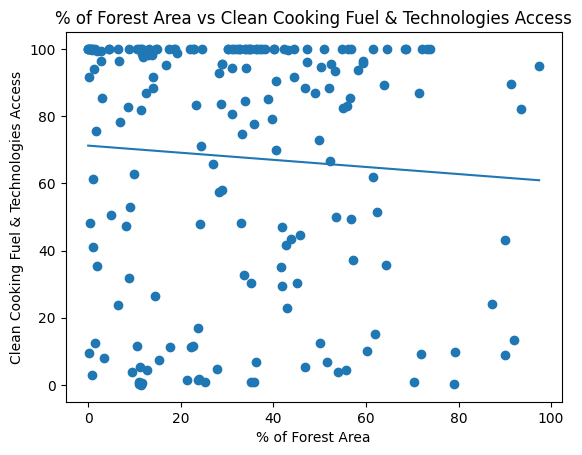

In [1627]:
plt.title("% of Forest Area vs Clean Cooking Fuel & Technologies Access")
plt.xlabel("% of Forest Area")
plt.ylabel("Clean Cooking Fuel & Technologies Access")
plt.scatter(forest_area, clean_cooking_fuel_access)
plt.plot(np.unique(forest_area), np.poly1d(np.polyfit(forest_area, clean_cooking_fuel_access, 1))(np.unique(forest_area)))

In [1628]:
corr = pearsonr(forest_area, clean_cooking_fuel_access)
corr

PearsonRResult(statistic=-0.06800101840137937, pvalue=0.34993974574355774)

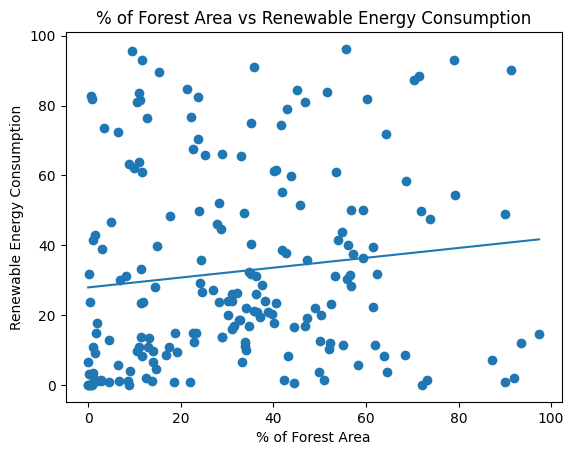

In [1629]:
plt.title("% of Forest Area vs Renewable Energy Consumption")
plt.xlabel("% of Forest Area")
plt.ylabel("Renewable Energy Consumption")
plt.scatter(forest_area, renewable_energy_consumption)
plt.plot(np.unique(forest_area), np.poly1d(np.polyfit(forest_area, renewable_energy_consumption, 1))(np.unique(forest_area)))

In [1630]:
corr = pearsonr(forest_area, renewable_energy_consumption)
corr

PearsonRResult(statistic=0.1218089654834384, pvalue=0.0932223408195959)

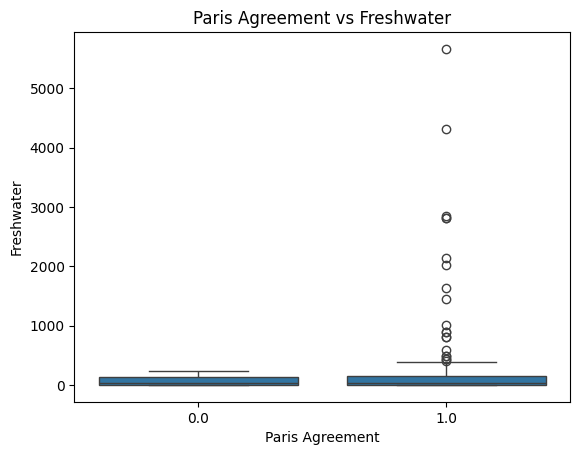

In [1631]:
sns.boxplot(x=paris_agreement, y=freshwater)
plt.xlabel('Paris Agreement')
plt.ylabel('Freshwater')
plt.title('Paris Agreement vs Freshwater')
plt.show()

In [1632]:
corr = pearsonr(freshwater, paris_agreement)
corr

PearsonRResult(statistic=0.061636014271066575, pvalue=0.3969724168746497)

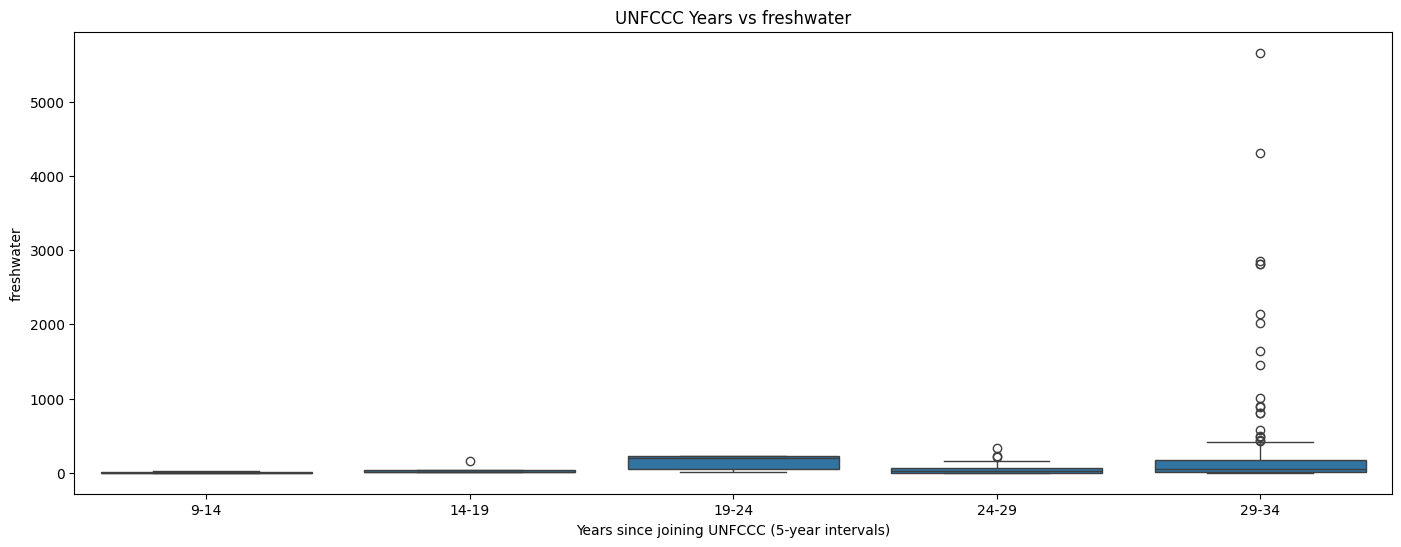

In [1633]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=year_bins, y=freshwater, data=lcdci_df)
plt.xlabel('Years since joining UNFCCC (5-year intervals)')
plt.ylabel('freshwater')
plt.title('UNFCCC Years vs freshwater')
plt.show()

In [1634]:
corr = pearsonr(freshwater, unfccc)
corr

PearsonRResult(statistic=0.13029094339517874, pvalue=0.07241466613795125)

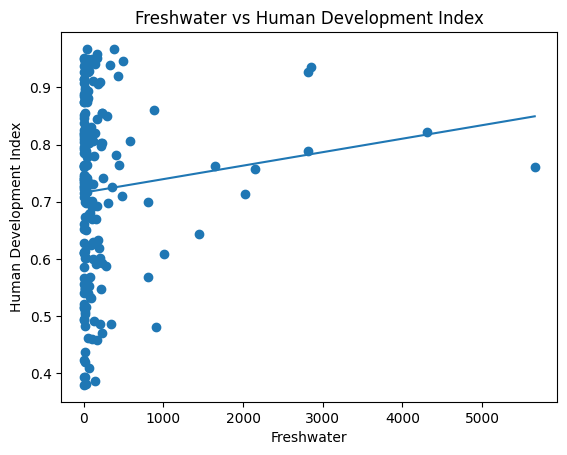

In [1635]:
plt.title("Freshwater vs Human Development Index")
plt.xlabel("Freshwater")
plt.ylabel("Human Development Index")
plt.scatter(freshwater, hdi)
plt.plot(np.unique(freshwater), np.poly1d(np.polyfit(freshwater, hdi, 1))(np.unique(freshwater)))

In [1636]:
corr = pearsonr(freshwater, hdi)
corr

PearsonRResult(statistic=0.10134968679483412, pvalue=0.1629914455283129)

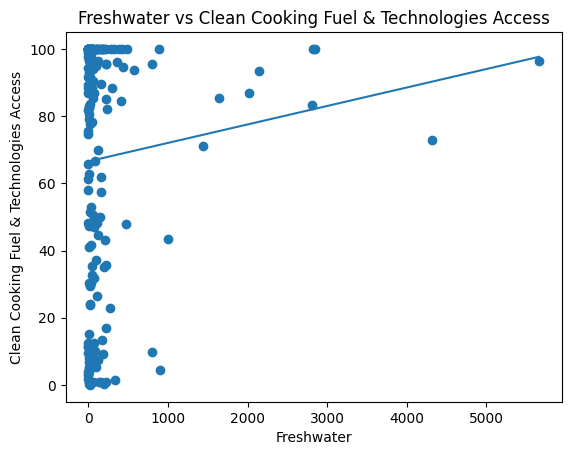

In [1637]:
plt.title("Freshwater vs Clean Cooking Fuel & Technologies Access")
plt.xlabel("Freshwater")
plt.ylabel("Clean Cooking Fuel & Technologies Access")
plt.scatter(freshwater, clean_cooking_fuel_access)
plt.plot(np.unique(freshwater), np.poly1d(np.polyfit(freshwater, clean_cooking_fuel_access, 1))(np.unique(freshwater)))

In [1638]:
corr = pearsonr(freshwater, clean_cooking_fuel_access)
corr

PearsonRResult(statistic=0.0990544122897872, pvalue=0.17277909528987598)

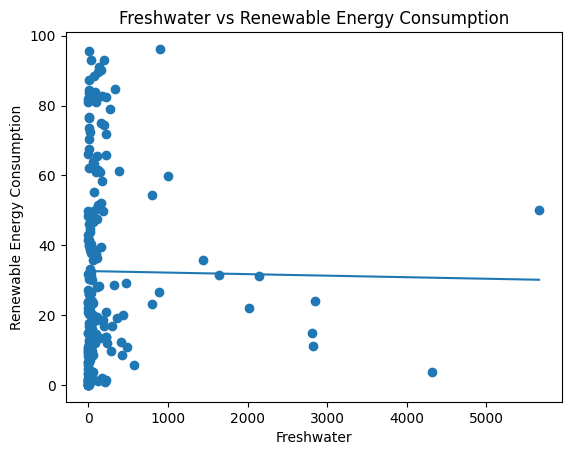

In [1639]:
plt.title("Freshwater vs Renewable Energy Consumption")
plt.xlabel("Freshwater")
plt.ylabel("Renewable Energy Consumption")
plt.scatter(freshwater, renewable_energy_consumption)
plt.plot(np.unique(freshwater), np.poly1d(np.polyfit(freshwater, renewable_energy_consumption, 1))(np.unique(freshwater)))

In [1640]:
corr = pearsonr(freshwater, renewable_energy_consumption)
corr

PearsonRResult(statistic=-0.010642112619403342, pvalue=0.8838301293421287)

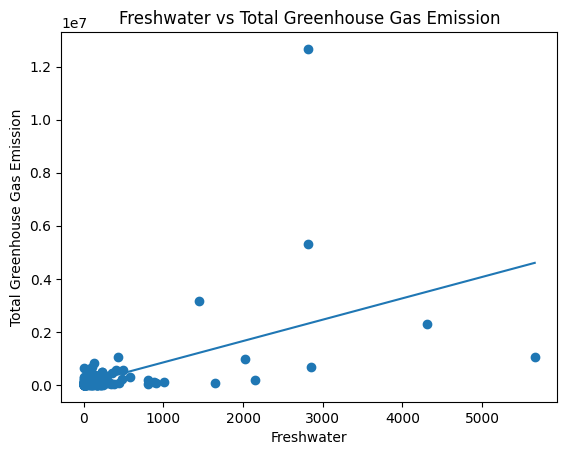

In [1641]:
plt.title("Freshwater vs Total Greenhouse Gas Emission")
plt.xlabel("Freshwater")
plt.ylabel("Total Greenhouse Gas Emission")
plt.scatter(freshwater, total_greenhouse_gas_emission)
plt.plot(np.unique(freshwater), np.poly1d(np.polyfit(freshwater, total_greenhouse_gas_emission, 1))(np.unique(freshwater)))

In [1642]:
corr = pearsonr(freshwater, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=0.5207590492415738, pvalue=1.1419327321472764e-14)

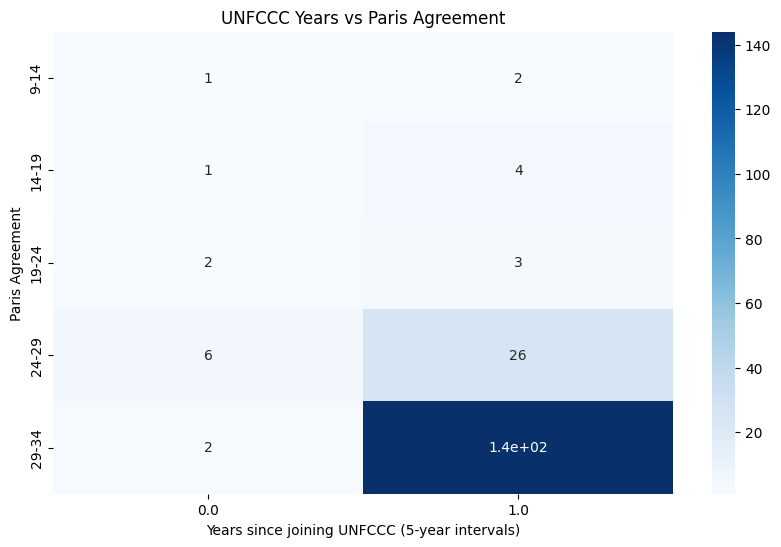

In [1643]:
ct_counts = lcdci_df.groupby(['year_bins', 'paris_agreement'], observed=False).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(ct_counts, annot=True, cmap='Blues')
plt.xlabel('Years since joining UNFCCC (5-year intervals)')
plt.ylabel('Paris Agreement')
plt.title('UNFCCC Years vs Paris Agreement')
plt.show()

In [1644]:
corr = pearsonr(paris_agreement, unfccc)
corr

PearsonRResult(statistic=0.3692369232080283, pvalue=1.4690612658042428e-07)

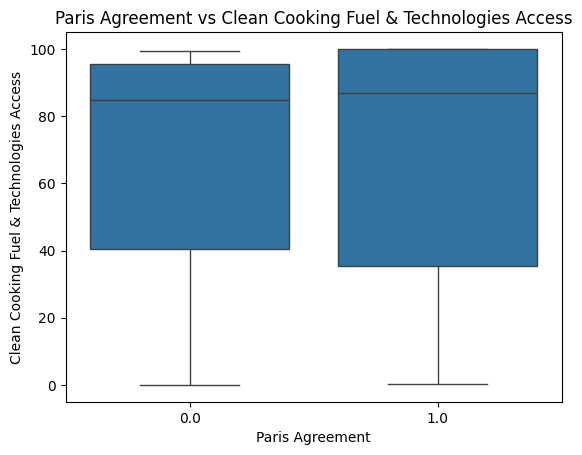

In [1645]:
sns.boxplot(x=paris_agreement, y=clean_cooking_fuel_access)
plt.xlabel('Paris Agreement')
plt.ylabel('Clean Cooking Fuel & Technologies Access')
plt.title('Paris Agreement vs Clean Cooking Fuel & Technologies Access')
plt.show()

In [1646]:
corr = pearsonr(paris_agreement, clean_cooking_fuel_access)
corr

PearsonRResult(statistic=0.02479442292507573, pvalue=0.7335035622661872)

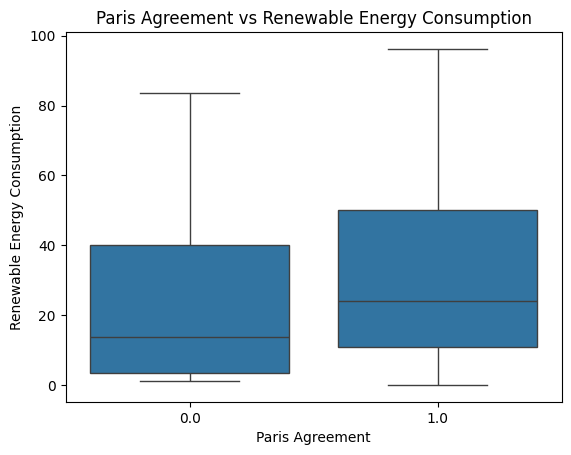

In [1647]:
sns.boxplot(x=paris_agreement, y=renewable_energy_consumption)
plt.xlabel('Paris Agreement')
plt.ylabel('Renewable Energy Consumption')
plt.title('Paris Agreement vs Renewable Energy Consumption')
plt.show()

In [1648]:
corr = pearsonr(paris_agreement, renewable_energy_consumption)
corr

PearsonRResult(statistic=0.04579366771928658, pvalue=0.5293118771321644)

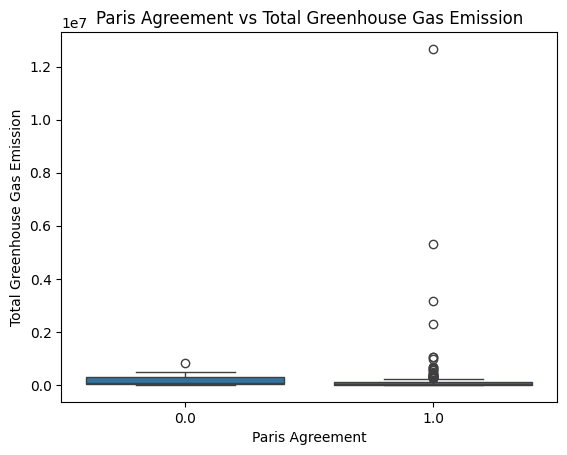

In [1649]:
sns.boxplot(x=paris_agreement, y=total_greenhouse_gas_emission)
plt.xlabel('Paris Agreement')
plt.ylabel('Total Greenhouse Gas Emission')
plt.title('Paris Agreement vs Total Greenhouse Gas Emission')
plt.show()

In [1650]:
corr = pearsonr(paris_agreement, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=0.009029991709083139, pvalue=0.9013308804376023)

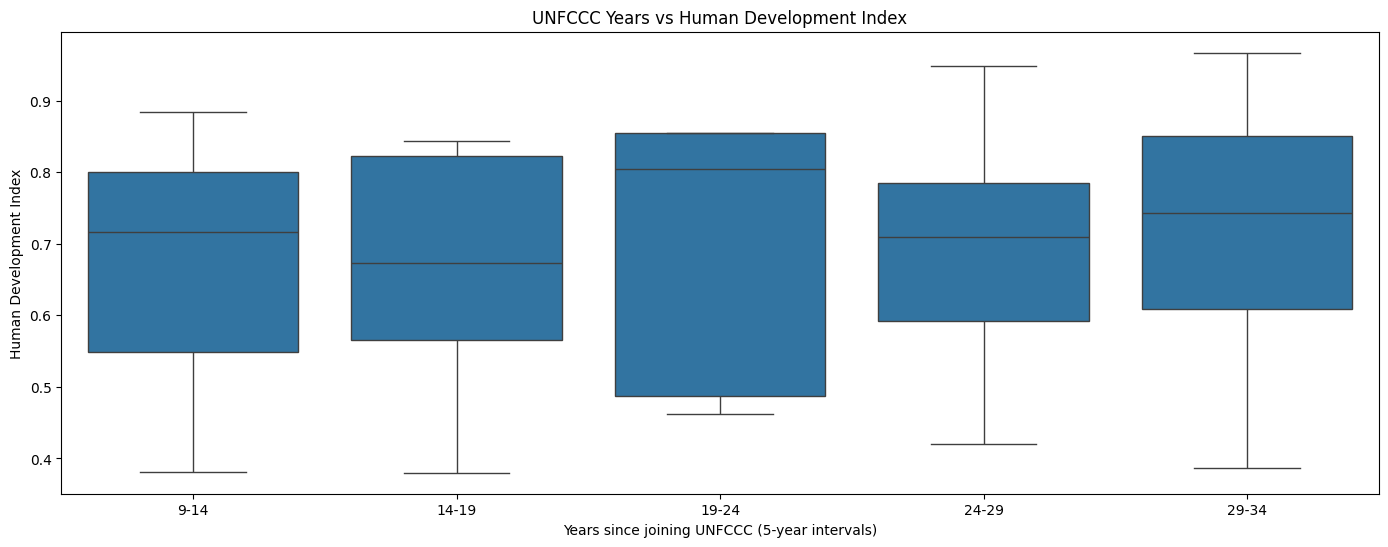

In [1651]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=year_bins, y=hdi, data=lcdci_df)
plt.xlabel('Years since joining UNFCCC (5-year intervals)')
plt.ylabel('Human Development Index')
plt.title('UNFCCC Years vs Human Development Index')
plt.show()

In [1652]:
corr = pearsonr(unfccc, hdi)
corr

PearsonRResult(statistic=0.163823276508292, pvalue=0.023540799504887716)

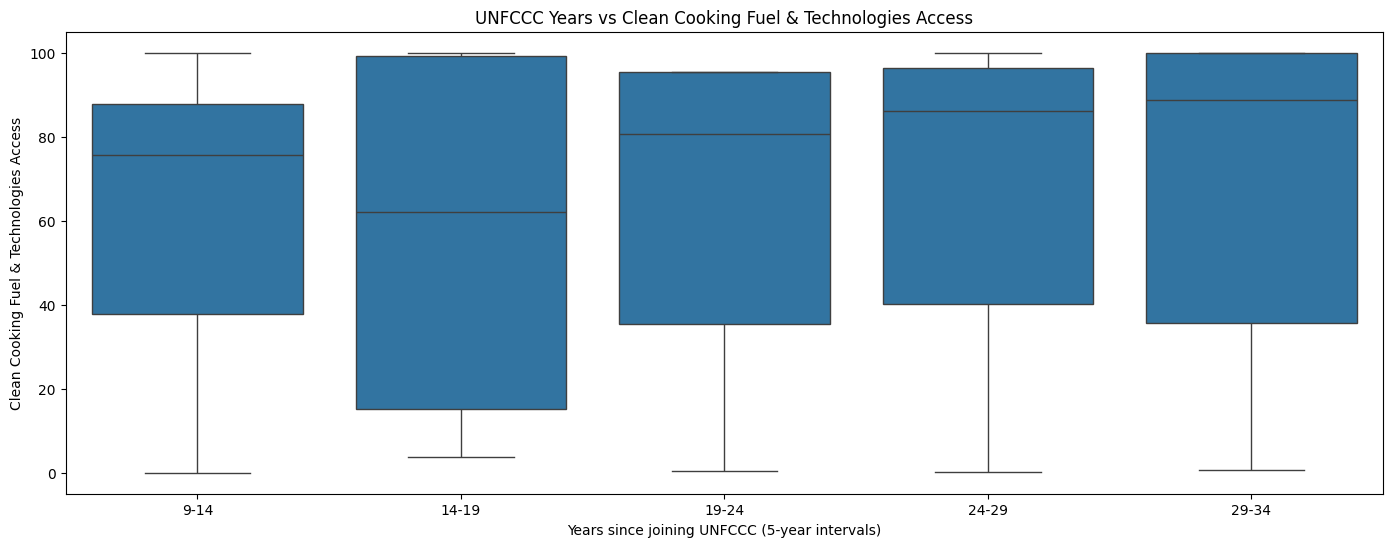

In [1653]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=year_bins, y=clean_cooking_fuel_access, data=lcdci_df)
plt.xlabel('Years since joining UNFCCC (5-year intervals)')
plt.ylabel('Clean Cooking Fuel & Technologies Access')
plt.title('UNFCCC Years vs Clean Cooking Fuel & Technologies Access')
plt.show()

In [1654]:
corr = pearsonr(unfccc, clean_cooking_fuel_access)
corr

PearsonRResult(statistic=0.11855375075235465, pvalue=0.10237313323302528)

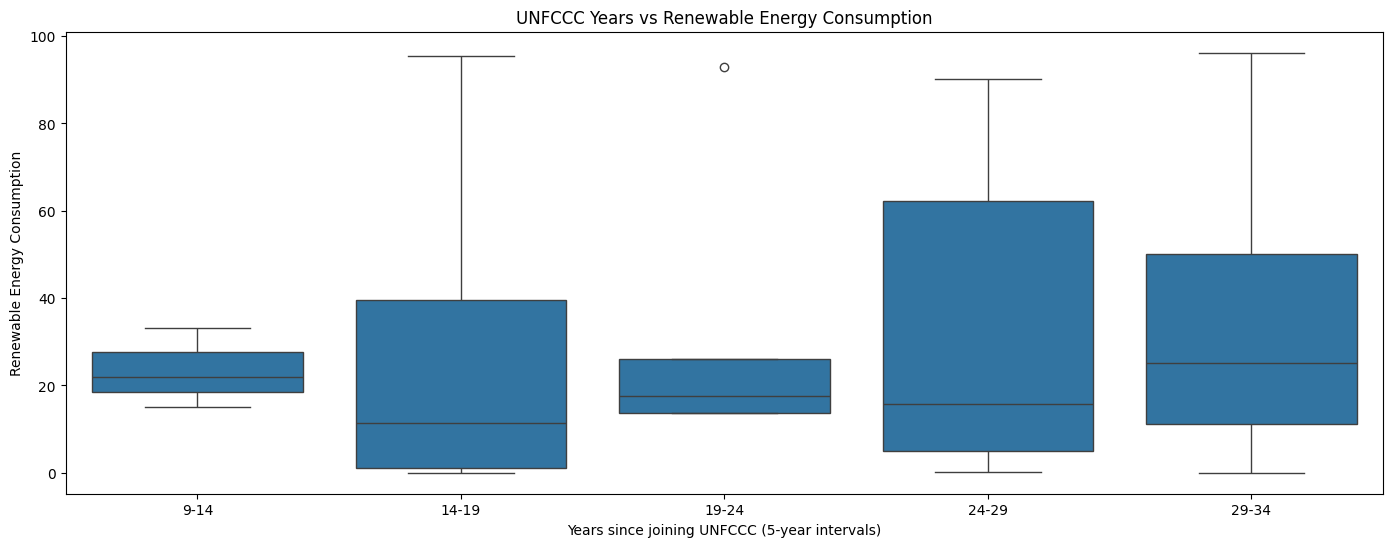

In [1655]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=year_bins, y=renewable_energy_consumption, data=lcdci_df)
plt.xlabel('Years since joining UNFCCC (5-year intervals)')
plt.ylabel('Renewable Energy Consumption')
plt.title('UNFCCC Years vs Renewable Energy Consumption')
plt.show()

In [1656]:
corr = pearsonr(unfccc, renewable_energy_consumption)
corr

PearsonRResult(statistic=0.0030270450726316823, pvalue=0.9668494011451338)

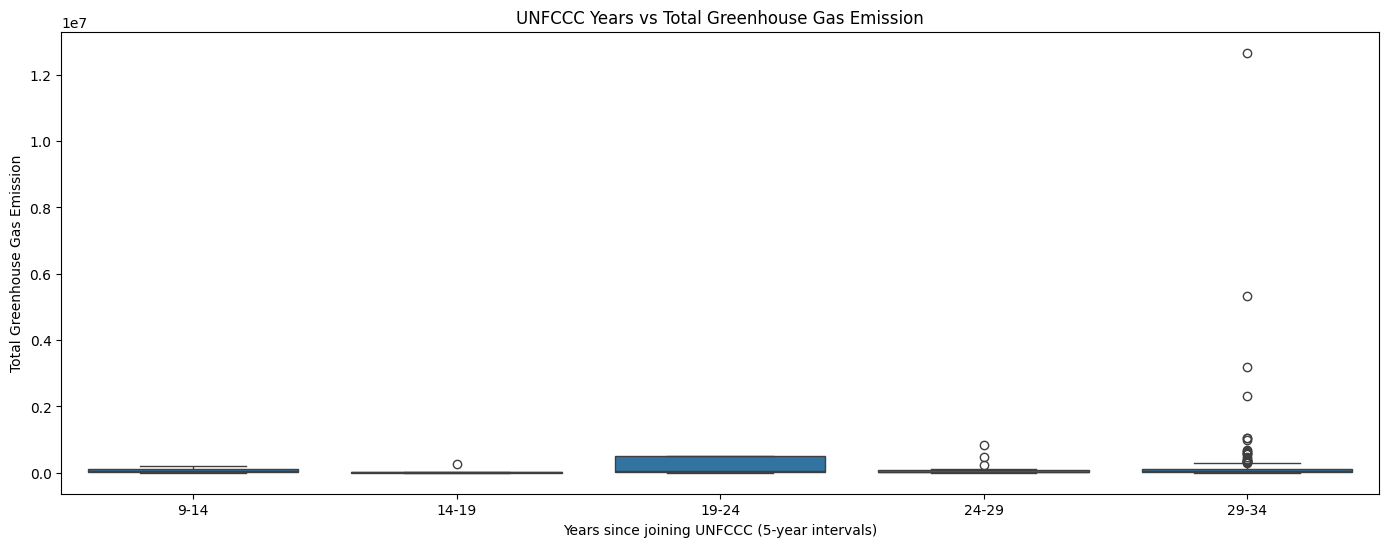

In [1657]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=year_bins, y=total_greenhouse_gas_emission, data=lcdci_df)
plt.xlabel('Years since joining UNFCCC (5-year intervals)')
plt.ylabel('Total Greenhouse Gas Emission')
plt.title('UNFCCC Years vs Total Greenhouse Gas Emission')
plt.show()

In [1658]:
corr = pearsonr(unfccc, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=0.0896556258978523, pvalue=0.21742010757825403)

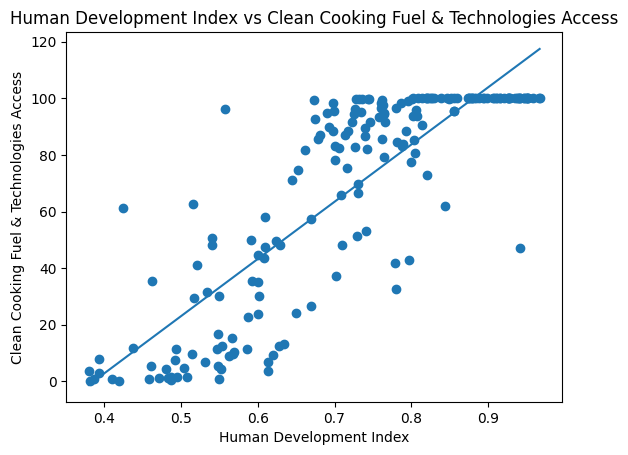

In [1659]:
plt.title("Human Development Index vs Clean Cooking Fuel & Technologies Access")
plt.xlabel("Human Development Index")
plt.ylabel("Clean Cooking Fuel & Technologies Access")
plt.scatter(hdi, clean_cooking_fuel_access)
plt.plot(np.unique(hdi), np.poly1d(np.polyfit(hdi, clean_cooking_fuel_access, 1))(np.unique(hdi)))

In [1660]:
corr = pearsonr(hdi, clean_cooking_fuel_access)
corr

PearsonRResult(statistic=0.8458071580821808, pvalue=1.8265823730896179e-53)

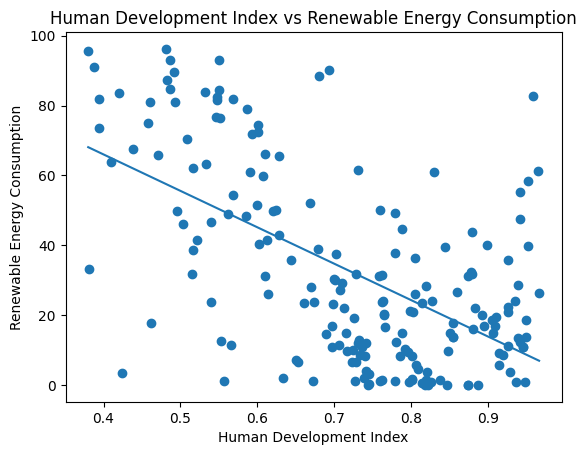

In [1661]:
plt.title("Human Development Index vs Renewable Energy Consumption")
plt.xlabel("Human Development Index")
plt.ylabel("Renewable Energy Consumption")
plt.scatter(hdi, renewable_energy_consumption)
plt.plot(np.unique(hdi), np.poly1d(np.polyfit(hdi, renewable_energy_consumption, 1))(np.unique(hdi)))

In [1662]:
corr = pearsonr(hdi, renewable_energy_consumption)
corr

PearsonRResult(statistic=-0.5848459224758474, pvalue=6.477071653093666e-19)

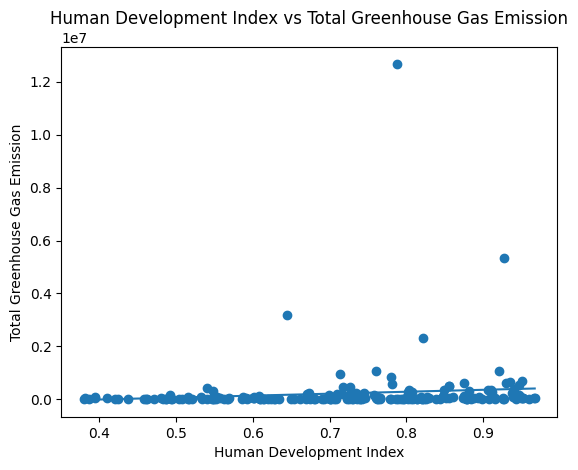

In [1663]:
plt.title("Human Development Index vs Total Greenhouse Gas Emission")
plt.xlabel("Human Development Index")
plt.ylabel("Total Greenhouse Gas Emission")
plt.scatter(hdi, total_greenhouse_gas_emission)
plt.plot(np.unique(hdi), np.poly1d(np.polyfit(hdi, total_greenhouse_gas_emission, 1))(np.unique(hdi)))

In [1664]:
corr = pearsonr(hdi, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=0.11044198699327332, pvalue=0.12826587759540706)

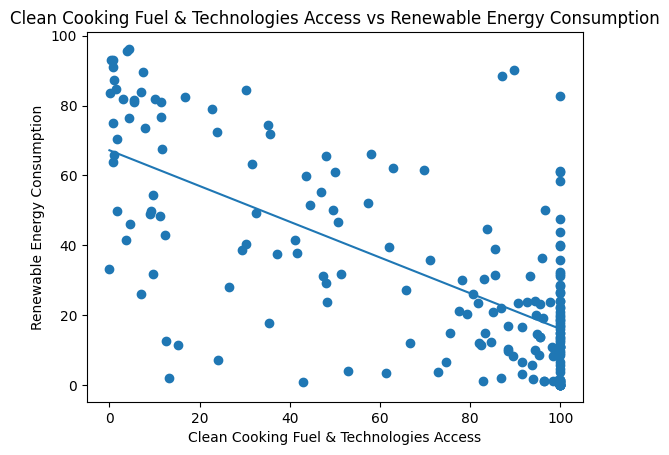

In [1665]:
plt.title("Clean Cooking Fuel & Technologies Access vs Renewable Energy Consumption")
plt.xlabel("Clean Cooking Fuel & Technologies Access")
plt.ylabel("Renewable Energy Consumption")
plt.scatter(clean_cooking_fuel_access, renewable_energy_consumption)
plt.plot(np.unique(clean_cooking_fuel_access), np.poly1d(np.polyfit(clean_cooking_fuel_access, renewable_energy_consumption, 1))(np.unique(clean_cooking_fuel_access)))

In [1666]:
corr = pearsonr(clean_cooking_fuel_access, renewable_energy_consumption)
corr

PearsonRResult(statistic=-0.6868621156135946, pvalue=5.367738579478271e-28)

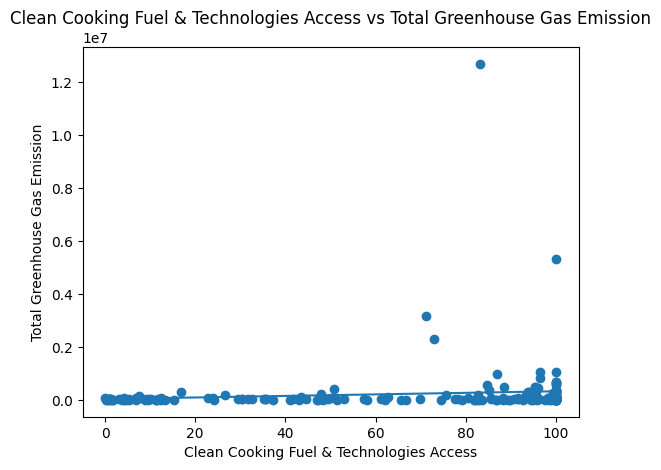

In [1667]:
plt.title("Clean Cooking Fuel & Technologies Access vs Total Greenhouse Gas Emission")
plt.xlabel("Clean Cooking Fuel & Technologies Access")
plt.ylabel("Total Greenhouse Gas Emission")
plt.scatter(clean_cooking_fuel_access, total_greenhouse_gas_emission)
plt.plot(np.unique(clean_cooking_fuel_access), np.poly1d(np.polyfit(clean_cooking_fuel_access, total_greenhouse_gas_emission, 1))(np.unique(clean_cooking_fuel_access)))

In [1668]:
corr = pearsonr(clean_cooking_fuel_access, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=0.10493312313894552, pvalue=0.14854878825728351)

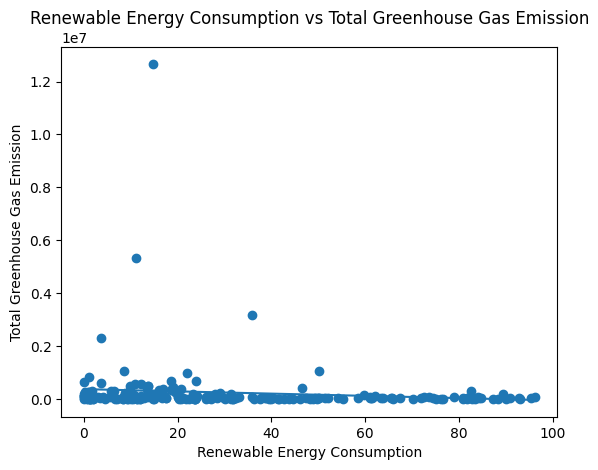

In [1669]:
plt.title("Renewable Energy Consumption vs Total Greenhouse Gas Emission")
plt.xlabel("Renewable Energy Consumption")
plt.ylabel("Total Greenhouse Gas Emission")
plt.scatter(renewable_energy_consumption, total_greenhouse_gas_emission)
plt.plot(np.unique(renewable_energy_consumption), np.poly1d(np.polyfit(renewable_energy_consumption, total_greenhouse_gas_emission, 1))(np.unique(renewable_energy_consumption)))

In [1670]:
corr = pearsonr(renewable_energy_consumption, total_greenhouse_gas_emission)
corr

PearsonRResult(statistic=-0.11362870786757863, pvalue=0.11754891256795619)

## Principal Component Analysis

In [1671]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [1672]:
lcdci_df_dropped = lcdci_df.drop('country', axis=1)
lcdci_df_dropped = lcdci_df_dropped.drop('region', axis=1)
lcdci_df_dropped = lcdci_df_dropped.drop('co2_emissions', axis=1)
lcdci_df_dropped = lcdci_df_dropped.drop('methane_emissions', axis=1)
lcdci_df_dropped = lcdci_df_dropped.drop('nitrous_oxide_emissions', axis=1)
lcdci_df_dropped = lcdci_df_dropped.drop('cooking_clean_fuel_and_technologies_access', axis=1)
lcdci_df_dropped = lcdci_df_dropped.drop('year_bins', axis=1)
lcdci_df_dropped.head()

,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,renewable_energy_consumption,total_greenhouse_gas_emission
0,0.82,11.2,1.0,31.0,0.745,0.2,260685.671220
1,53.43,148.0,0.0,24.0,0.591,61.0,70275.605950
2,27.80,10.3,1.0,30.0,0.504,46.2,15017.664044
3,26.92,2.4,1.0,30.0,0.708,27.2,12161.814371
4,22.72,12.5,1.0,31.0,0.438,67.5,30925.645070


In [1673]:
scaler = StandardScaler()
lcdci_df_scaled = scaler.fit_transform(lcdci_df_dropped)

In [1674]:
pca = PCA() 

In [1675]:
lcdci_df_pca = pca.fit_transform(lcdci_df_scaled)

In [1676]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26188571, 0.20932214, 0.18901645, 0.14120775, 0.08472496,
       0.06201602, 0.05182696])

In [1677]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var

array([26.2, 20.9, 18.9, 14.1,  8.5,  6.2,  5.2])

In [1678]:
loading_scores_pca = np.round(pca.components_[:6] * 100) 

loading_scores_df = pd.DataFrame(loading_scores_pca.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=lcdci_df_dropped.columns.tolist())

loading_scores_df

,PC1,PC2,PC3,PC4,PC5,PC6
forest_area,14.0,37.0,-16.0,81.0,-22.0,30.0
freshwater,44.0,32.0,46.0,8.0,-10.0,-68.0
paris_agreement,29.0,35.0,-52.0,-10.0,71.0,-10.0
years_since_unfccc,34.0,27.0,-38.0,-50.0,-62.0,14.0
hdi,51.0,-42.0,-22.0,19.0,-7.0,-10.0
renewable_energy_consumption,-38.0,61.0,5.0,-9.0,-5.0,-5.0
total_greenhouse_gas_emission,43.0,14.0,54.0,-18.0,23.0,63.0


Text(0.5, 1.0, 'Scree Plot')

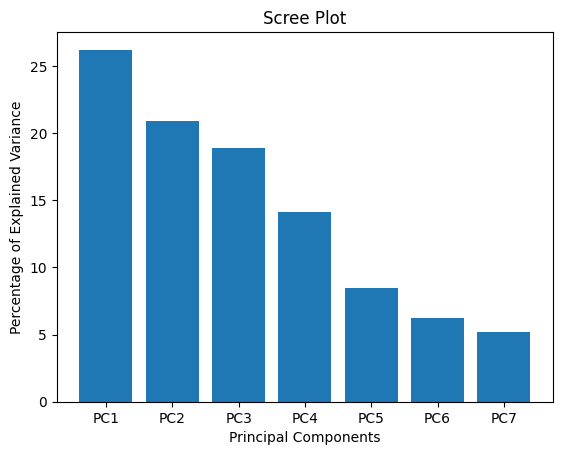

In [1679]:
labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")

Take the first 6 PCA components as it explains almost 95% of the variance

In [1680]:
selected_components = lcdci_df_pca[:, :6]

## Clustering

In [1681]:
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

In [1682]:
num_clusters = 4

In [1683]:
best_random_state = None 
best_silhouette_score = -1.0  

random_state_values = range(0, 1000)

for random_state in random_state_values:
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(selected_components)
    silhouette_avg = silhouette_score(selected_components, clusters)

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_random_state = random_state

print("Best random state:", best_random_state)
print("Best silhouette score:", best_silhouette_score)

Best random state: 144
Best silhouette score: 0.5248977446167037


In [1684]:
kmeans = KMeans(n_clusters=num_clusters, random_state=144)
clusters = kmeans.fit_predict(selected_components)

In [1685]:
silhouette_avg = silhouette_score(selected_components, clusters)
print("For n_clusters =", num_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.5248977446167037


In [1686]:
colour_list = ['blue', 'green', 'red', 'orange', 'purple'] 
region_colours = dict(zip(lcdci_df['region'].unique(), colour_list))
country_colours = lcdci_df['region'].map(region_colours) 
region_colours


{'African Group': 'blue',
 'Asia-Pacific Group': 'green',
 'Eastern European Group': 'red',
 'GRULAC': 'orange',
 'WEOG': 'purple'}

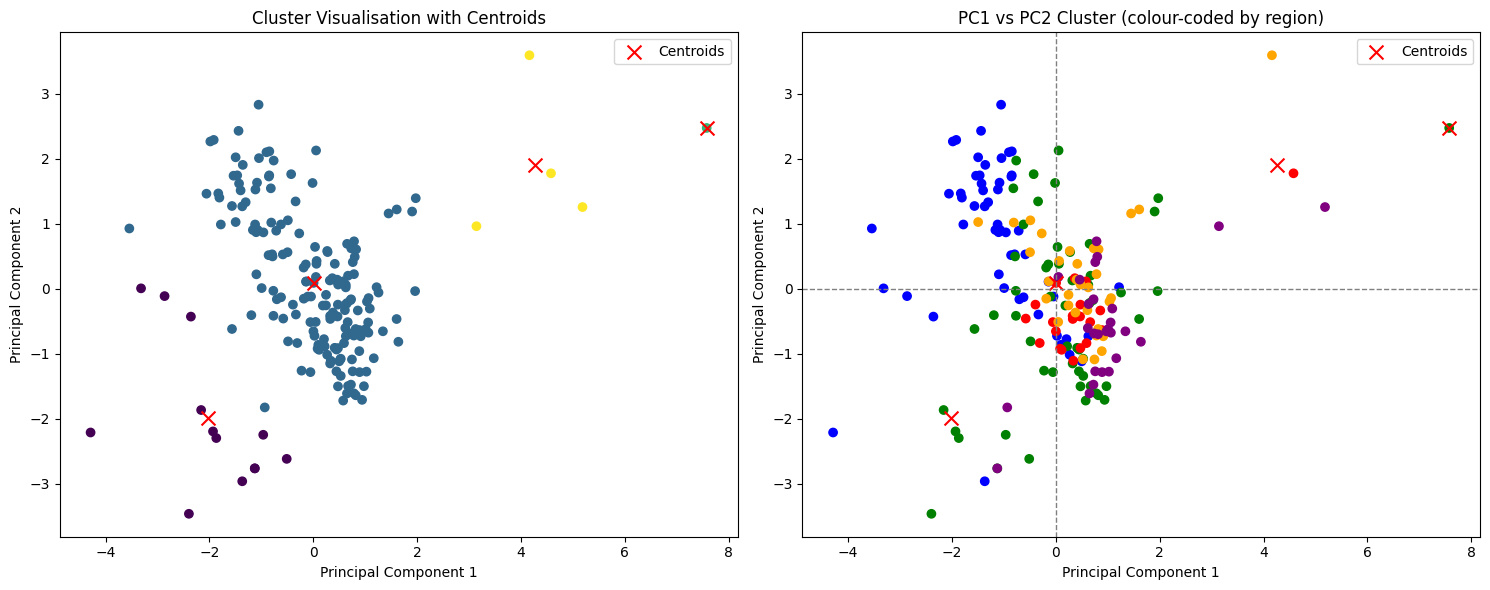

In [1687]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(selected_components[:, 0], selected_components[:, 1], c=clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualisation with Centroids')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(selected_components[:, 0], selected_components[:, 1], c=country_colours)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 vs PC2 Cluster (colour-coded by region)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
plt.axvline(0, color='gray', linestyle='--', linewidth=1) 
plt.legend()

plt.tight_layout() 
plt.show()

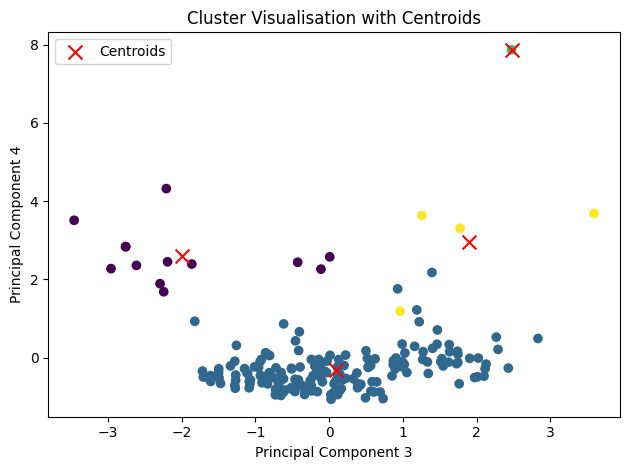

In [1688]:
plt.scatter(selected_components[:, 1], selected_components[:, 2], c=clusters)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PC2 vs PC3 Cluster (colour-coded by cluster)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
plt.axvline(0, color='gray', linestyle='--', linewidth=1) 
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(selected_components[:, 1], selected_components[:, 2], c=country_colours)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PC2 vs PC3 Cluster (colour-coded by region)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
plt.axvline(0, color='gray', linestyle='--', linewidth=1) 
plt.legend()

plt.tight_layout() 
plt.show()

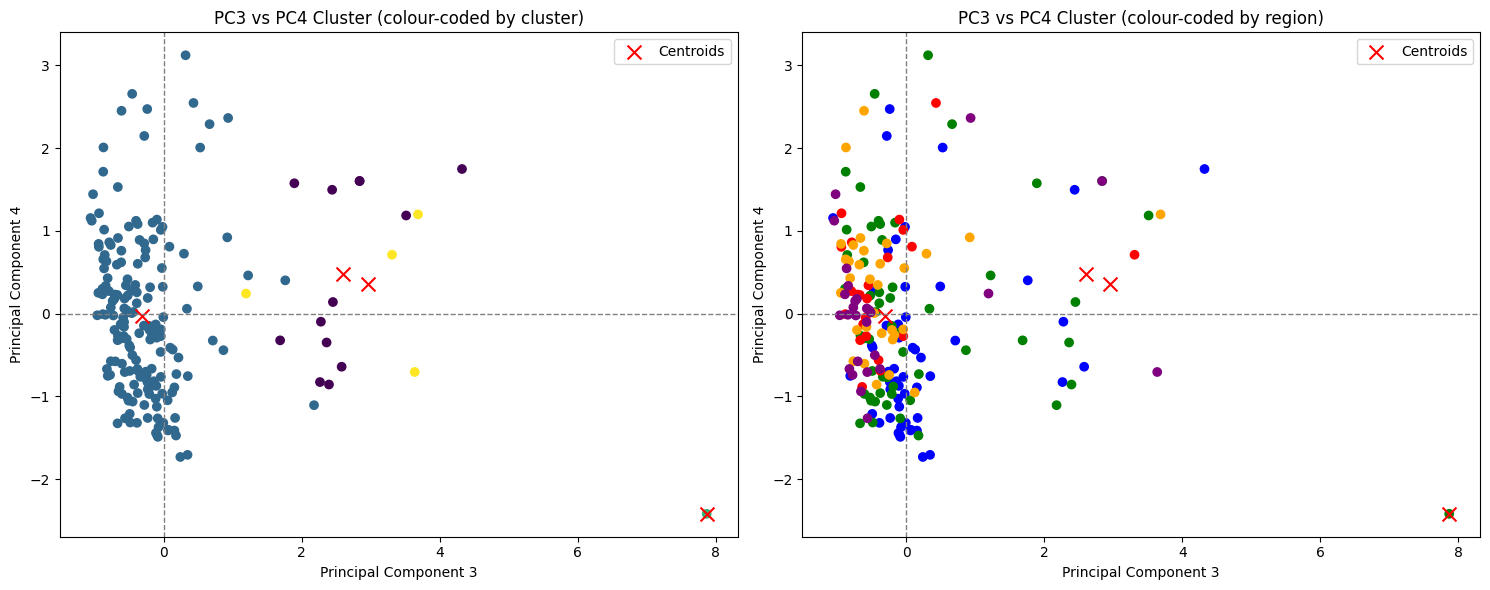

In [1689]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(selected_components[:, 2], selected_components[:, 3], c=clusters)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('Cluster Visualisation with Centroids')
plt.legend()

plt.tight_layout() 
plt.show()

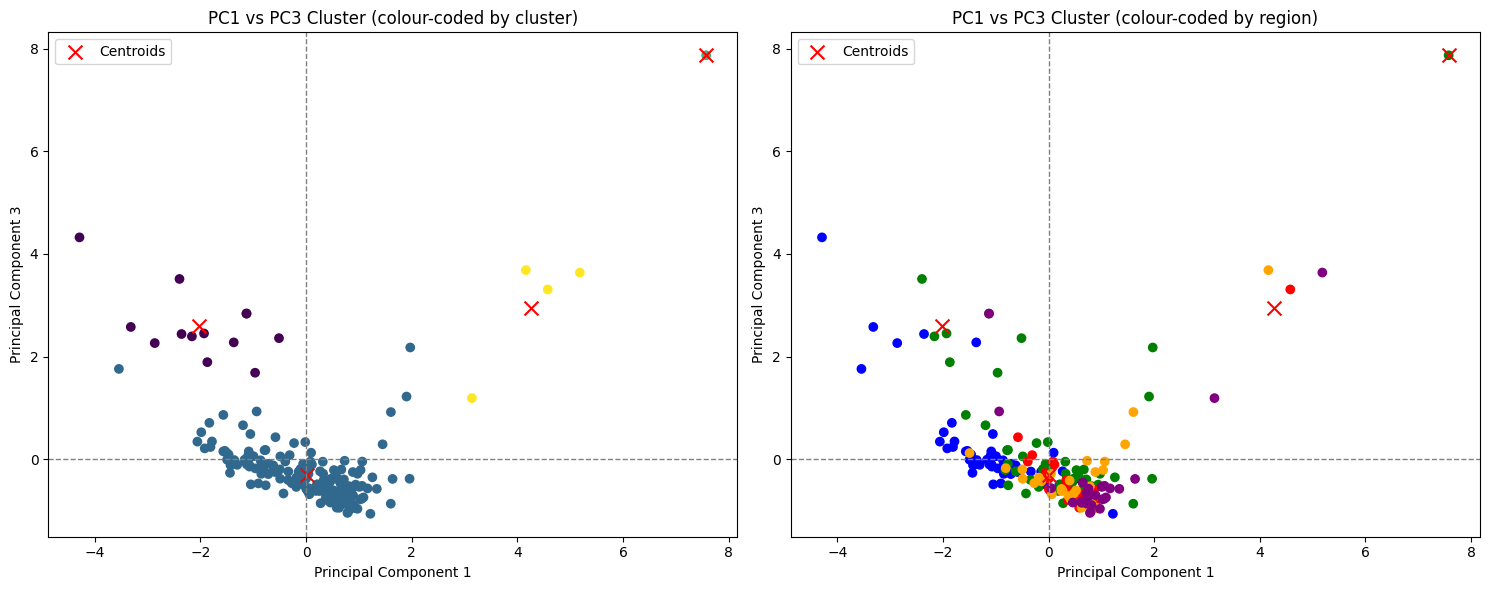

In [1690]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(selected_components[:, 0], selected_components[:, 2], c=clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PC1 vs PC3 Cluster (colour-coded by cluster)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
plt.axvline(0, color='gray', linestyle='--', linewidth=1) 
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(selected_components[:, 0], selected_components[:, 2], c=country_colours)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PC1 vs PC3 Cluster (colour-coded by region)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
plt.axvline(0, color='gray', linestyle='--', linewidth=1) 
plt.legend()

plt.tight_layout() 
plt.show()

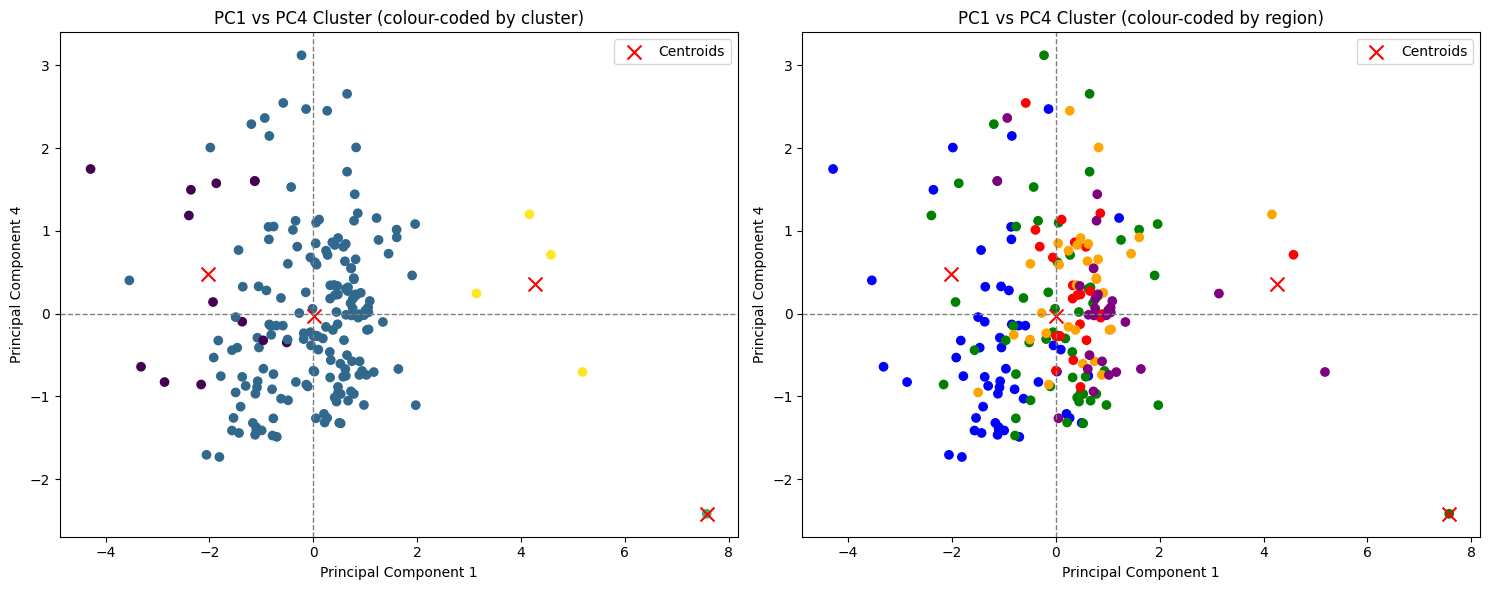

In [1691]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(selected_components[:, 0], selected_components[:, 3], c=clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 4')
plt.title('PC1 vs PC4 Cluster (colour-coded by cluster)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
plt.axvline(0, color='gray', linestyle='--', linewidth=1) 
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(selected_components[:, 0], selected_components[:, 3], c=country_colours)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 4')
plt.title('PC1 vs PC4 Cluster (colour-coded by region)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
plt.axvline(0, color='gray', linestyle='--', linewidth=1) 
plt.legend()

plt.tight_layout() 
plt.show()

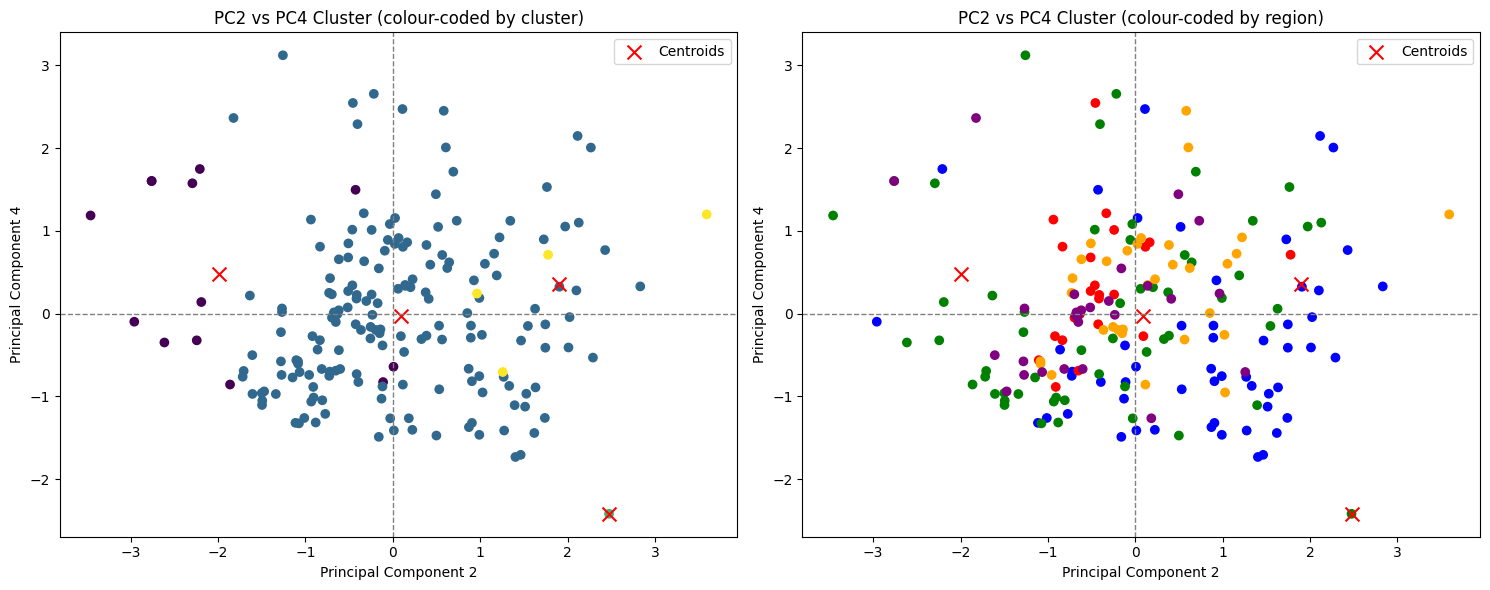

In [1692]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(selected_components[:, 1], selected_components[:, 3], c=clusters)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 4')
plt.title('PC2 vs PC4 Cluster (colour-coded by cluster)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
plt.axvline(0, color='gray', linestyle='--', linewidth=1) 
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(selected_components[:, 1], selected_components[:, 3], c=country_colours)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 4')
plt.title('PC2 vs PC4 Cluster (colour-coded by region)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
plt.axvline(0, color='gray', linestyle='--', linewidth=1) 
plt.legend()

plt.tight_layout() 
plt.show()

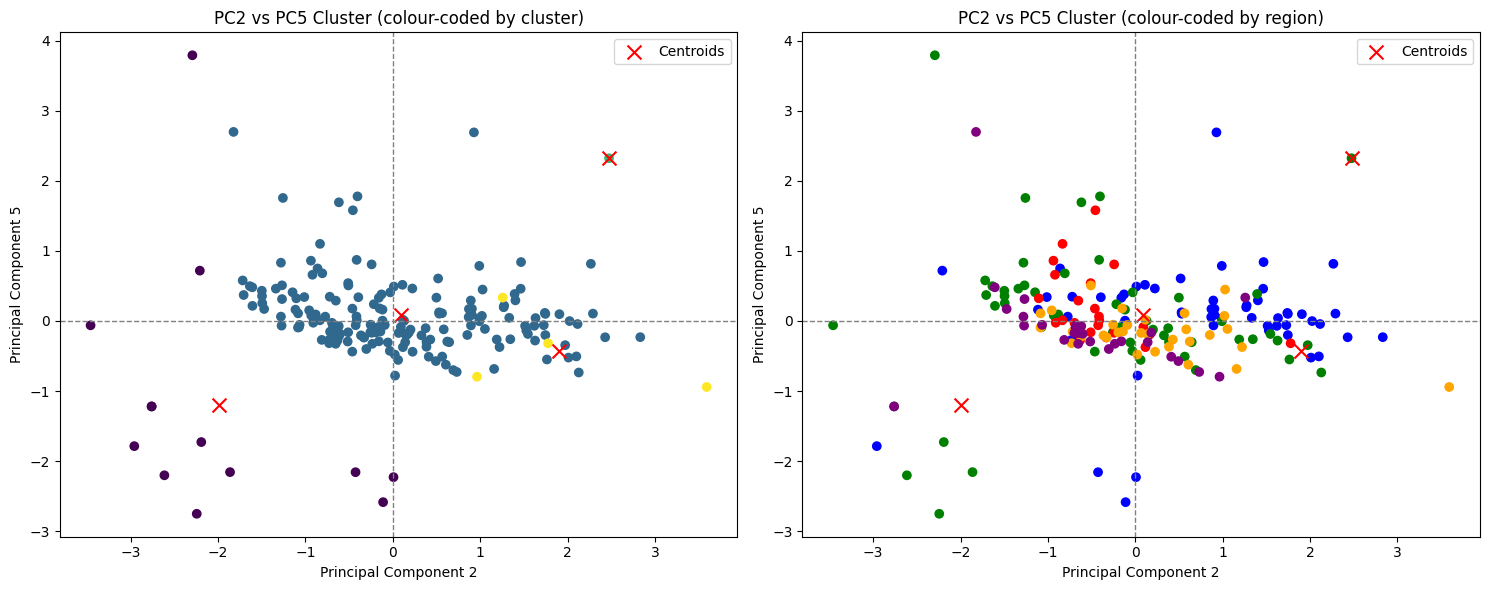

In [1693]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(selected_components[:, 1], selected_components[:, 4], c=clusters)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 4], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 5')
plt.title('PC2 vs PC5 Cluster (colour-coded by cluster)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
plt.axvline(0, color='gray', linestyle='--', linewidth=1) 
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(selected_components[:, 1], selected_components[:, 4], c=country_colours)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 4], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 5')
plt.title('PC2 vs PC5 Cluster (colour-coded by region)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
plt.axvline(0, color='gray', linestyle='--', linewidth=1) 
plt.legend()

plt.tight_layout() 
plt.show()

In [1694]:
max_year = lcdci_df['years_since_unfccc'].max()
bins = np.arange(lcdci_df['years_since_unfccc'].min(), max_year + 5, 5)
bin_labels = [f"{int(start)}-{int(end)}" for start, end in zip(bins[:-1], bins[1:])]
bin_labels

['9-14', '14-19', '19-24', '24-29', '29-34']

In [1695]:
lcdci_df_dropped['cluster'] = clusters 
grouped_df = lcdci_df_dropped.groupby('cluster')
grouped_df.describe()

forest_area                                                            \
              count       mean        std    min    25%     50%    75%    max   
cluster                                                                         
0              13.0  13.542308  15.242996   0.12   1.90  10.450  14.01  53.43   
1             173.0  33.622543  24.052927   0.00  12.43  32.730  50.32  97.41   
2               1.0  23.340000        NaN  23.34  23.34  23.340  23.34  23.34   
3               4.0  45.305000  11.564487  33.87  37.08  43.965  52.19  59.42   

        freshwater                                                             \
             count         mean          std     min     25%     50%      75%   
cluster                                                                         
0             13.0    66.300000    86.011123     0.7     2.8    26.0   128.50   
1            173.0   143.020368   314.186822     0.0     6.0    35.5   136.60   
2              1.0  2812.900000          NaN  2812.9  2812.9  2812.9  2812.90   
3              4.0  3910.250000  1359.371025  2818.0  2842.0  3581.0  4649.25   

                paris_agreement                                              \
            max           count      mean      std  min  25%  50%  75%  max   
cluster                                                                       
0         227.0            13.0  0.076923  0.27735  0.0  0.0  0.0  0.0  1.0   
1        2145.0           173.0  1.000000  0.00000  1.0  1.0  1.0  1.0  1.0   
2        2812.9             1.0  1.000000      NaN  1.0  1.0  1.0  1.0  1.0   
3        5661.0             4.0  1.000000  0.00000  1.0  1.0  1.0  1.0  1.0   

        years_since_unfccc                                                     \
                     count       mean       std   min   25%   50%   75%   max   
cluster                                                                         
0                     13.0  22.230769  7.049277   9.0  20.0  24.0  28.0  30.0   
1                    173.0  29.046243  2.901113  13.0  29.0  30.0  31.0  32.0   
2                      1.0  31.000000       NaN  31.0  31.0  31.0  31.0  31.0   
3                      4.0  31.000000  1.154701  30.0  30.0  31.0  32.0  32.0   

           hdi                                                           \
         count      mean       std    min      25%    50%    75%    max   
cluster                                                                   
0         13.0  0.642923  0.165024  0.381  0.49300  0.701  0.746  0.855   
1        173.0  0.723757  0.154009  0.380  0.60100  0.739  0.847  0.967   
2          1.0  0.788000       NaN  0.788  0.78800  0.788  0.788  0.788   
3          4.0  0.860750  0.084917  0.760  0.80575  0.874  0.929  0.935   

        renewable_energy_consumption                                      \
                               count       mean        std   min     25%   
cluster                                                                    
0                               13.0  26.646154  29.832047   1.0   3.500   
1                              173.0  33.280347  27.747643   0.0  10.900   
2                                1.0  14.800000        NaN  14.8  14.800   
3                                4.0  22.225000  20.367846   3.7   9.325   

                            total_greenhouse_gas_emission                \
           50%    75%   max                         count          mean   
cluster                                                                   
0        13.70  33.20  83.5                          13.0  1.955966e+05   
1        24.10  50.10  96.2                         173.0  1.139335e+05   
2        14.80  14.80  14.8                           1.0  1.266789e+07   
3        17.55  30.45  50.1                           4.0  2.337515e+06   

                                                                               \
                  std           min           25%           50%           75%   
clu

In [1696]:
cluster_averages = lcdci_df_dropped.groupby('cluster').mean()
cluster_averages


,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,renewable_energy_consumption,total_greenhouse_gas_emission
cluster,,,,,,,
0,13.542308,66.300000,0.076923,22.230769,0.642923,26.646154,1.955966e+05
1,33.622543,143.020368,1.000000,29.046243,0.723757,33.280347,1.139335e+05
2,23.340000,2812.900000,1.000000,31.000000,0.788000,14.800000,1.266789e+07
3,45.305000,3910.250000,1.000000,31.000000,0.860750,22.225000,2.337515e+06


In [1697]:
lcdci_df_final = lcdci_df_dropped.copy()

In [1698]:
lcdci_df_final['country'] = lcdci_df['country']
lcdci_df_final['region'] = lcdci_df['region']

In [1699]:
cluster_0_countries = lcdci_df_final[lcdci_df_final['cluster'] == 0] 
cluster_0_countries


,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,renewable_energy_consumption,total_greenhouse_gas_emission,cluster,country,region
1,53.43,148.0,0.0,24.0,0.591,61.0,70275.605950,0,Angola,African Group
5,10.89,10.1,0.0,27.0,0.420,83.5,3608.046931,0,Burundi,African Group
17,10.45,2.8,0.0,29.0,0.493,80.9,6169.104706,0,Eritrea,African Group
27,0.12,0.7,0.0,25.0,0.746,3.1,70297.772547,0,Libya,African Group
45,11.33,26.0,0.0,10.0,0.381,33.2,55946.880780,0,South Sudan,African Group
66,6.60,128.5,0.0,28.0,0.780,1.0,830923.078760,0,Iran (Islamic Republic of),Asia-Pacific Group
67,1.90,35.2,0.0,15.0,0.673,1.1,254868.161649,0,Iraq,Asia-Pacific Group
73,6.86,48.9,0.0,24.0,0.701,30.0,15961.297206,0,Kyrgyzstan,Asia-Pacific Group
75,14.01,4.8,0.0,30.0,0.723,6.7,25780.527367,0,Lebanon,Asia-Pacific Group
88,1.68,0.8,1.0,9.0,0.716,15.0,193091.989749,0,State of Palestine,Asia-Pacific Group


In [1700]:
cluster_1_countries = lcdci_df_final[lcdci_df_final['cluster'] == 1] 
cluster_1_countries

,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,renewable_energy_consumption,total_greenhouse_gas_emission,cluster,country,region
0,0.82,11.200000,1.0,31.0,0.745000,0.2,2.606857e+05,1,Algeria,African Group
2,27.80,10.300000,1.0,30.0,0.504000,46.2,1.501766e+04,1,Benin,African Group
3,26.92,2.400000,1.0,30.0,0.708000,27.2,1.216181e+04,1,Botswana,African Group
4,22.72,12.500000,1.0,31.0,0.438000,67.5,3.092565e+04,1,Burkina Faso,African Group
6,11.34,0.300000,1.0,29.0,0.661000,23.4,7.732832e+02,1,Cabo Verde,African Group
7,43.03,273.000000,1.0,30.0,0.587000,78.9,9.012560e+04,1,Cameroon,African Group
8,35.80,141.000000,1.0,29.0,0.387000,90.9,2.097368e+04,1,Central African Republic,African Group
9,3.43,15.000000,1.0,30.0,0.394000,73.6,8.873191e+04,1,Chad,African Group
10,17.70,1.200000,1.0,30.0,0.586000,48.3,6.118337e+02,1,Comoros,African Group
11,64.26,222.000000,1.0,28.0,0.593000,71.9,1.872118e+04,1,Congo,African Group


In [1701]:
cluster_2_countries = lcdci_df_final[lcdci_df_final['cluster'] == 2] 
cluster_2_countries

,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,renewable_energy_consumption,total_greenhouse_gas_emission,cluster,country,region
60,23.34,2812.9,1.0,31.0,0.788,14.8,1.266789e+07,2,China,Asia-Pacific Group


In [1702]:
cluster_3_countries = lcdci_df_final[lcdci_df_final['cluster'] == 3] 
cluster_3_countries

,forest_area,freshwater,paris_agreement,years_since_unfccc,hdi,renewable_energy_consumption,total_greenhouse_gas_emission,cluster,country,region
126,49.78,4312.0,1.0,30.0,0.821,3.7,2.304729e+06,3,Russian Federation,Eastern European Group
138,59.42,5661.0,1.0,30.0,0.760,50.1,1.054456e+06,3,Brazil,GRULAC
168,38.15,2850.0,1.0,32.0,0.935,23.9,6.640974e+05,3,Canada,WEOG
190,33.87,2818.0,1.0,32.0,0.927,11.2,5.326776e+06,3,United States of America,WEOG


In [1703]:
countries = lcdci_df_final.pop('country')  
lcdci_df_final.insert(0, countries.name, countries) 

In [1704]:
lcdci_df_final.drop('cluster', axis=1, inplace=True)
lcdci_df_final.to_csv("lcdci/lcdci_final.csv", index=False)